# Практика 2

In [7]:
%pip install pandas seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 30.8+ KB


### Борьба c NaN

In [8]:
print("Было пропусков в Sleep Disorder:", df['Sleep Disorder'].isnull().sum())
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('unckown')
print("Стало пропусков:", df['Sleep Disorder'].isnull().sum())

Было пропусков в Sleep Disorder: 219
Стало пропусков: 0


### Object -> category

In [9]:
df['Gender'] = df['Gender'].astype('category')
df['Occupation'] = df['Occupation'].astype('category') 
df['BMI Category'] = df['BMI Category'].astype('category')
df['Sleep Disorder'] = df['Sleep Disorder'].astype('category')
df['Blood Pressure'] = df['Blood Pressure'].astype('category')
'Sleep Duration' in df.columns

True

### Выбор признаков

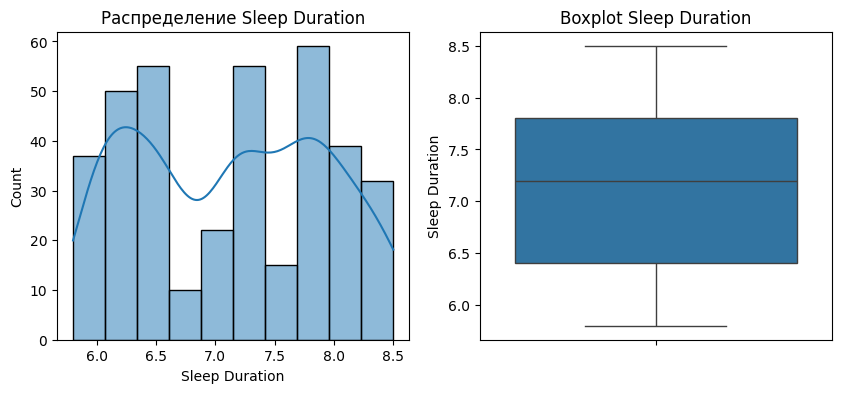

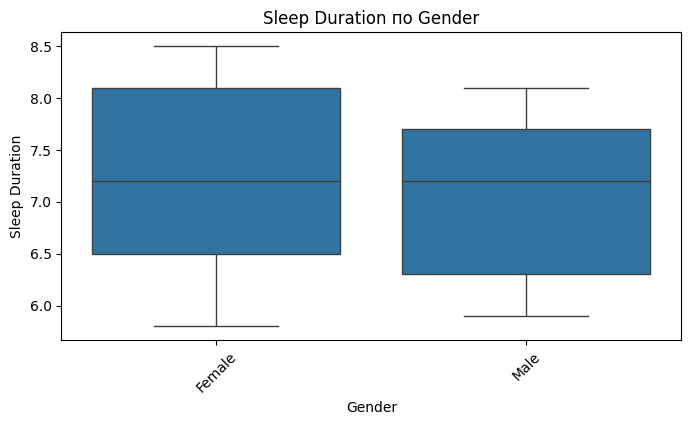

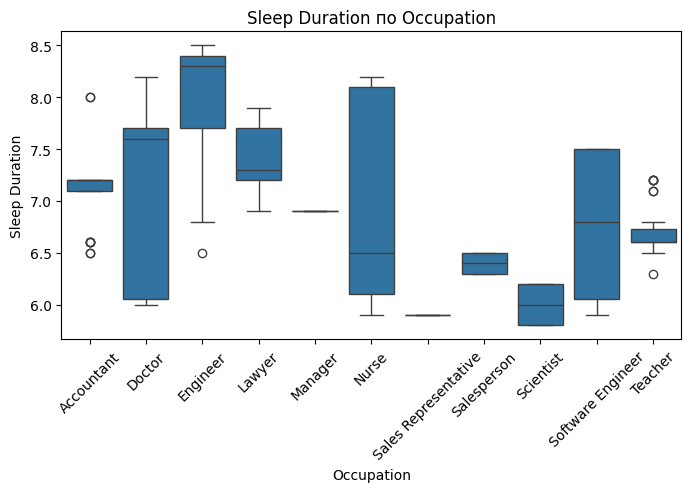

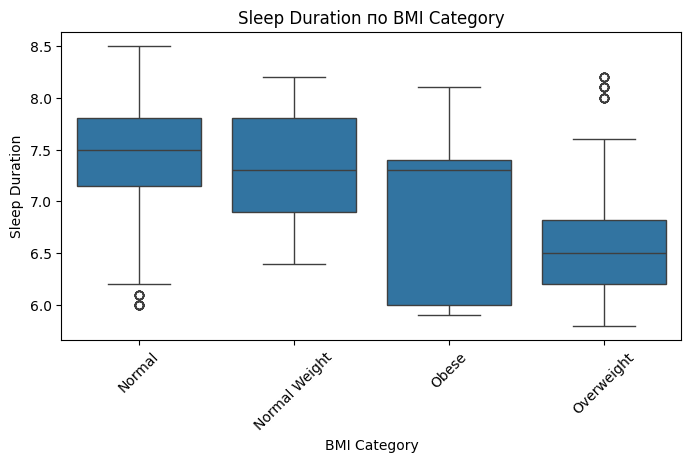

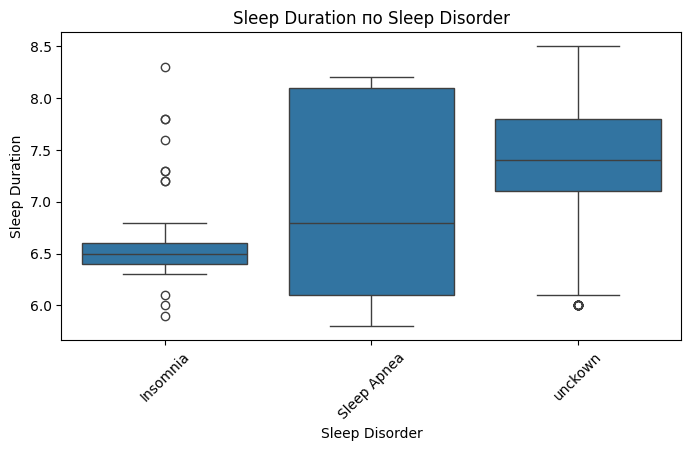

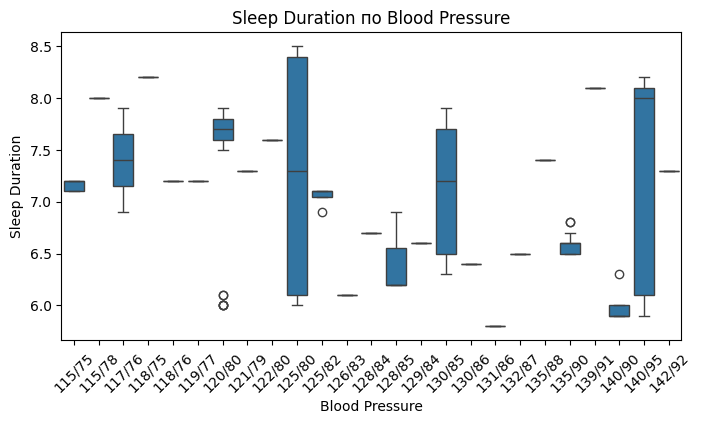

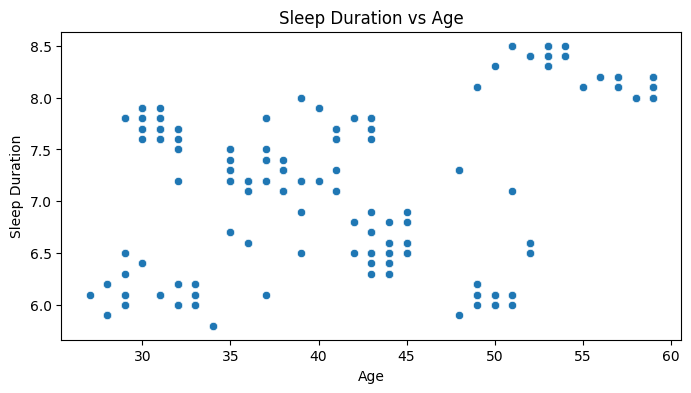

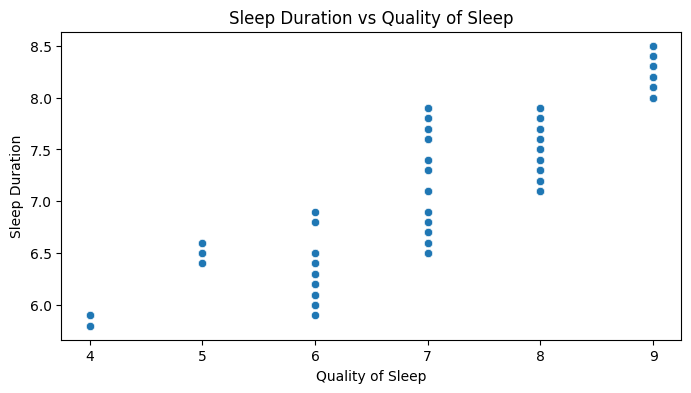

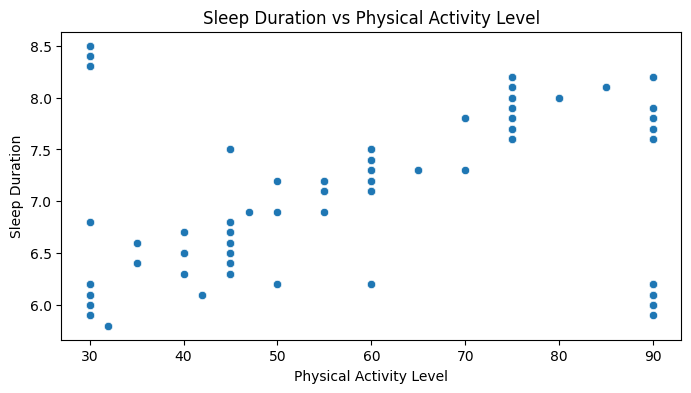

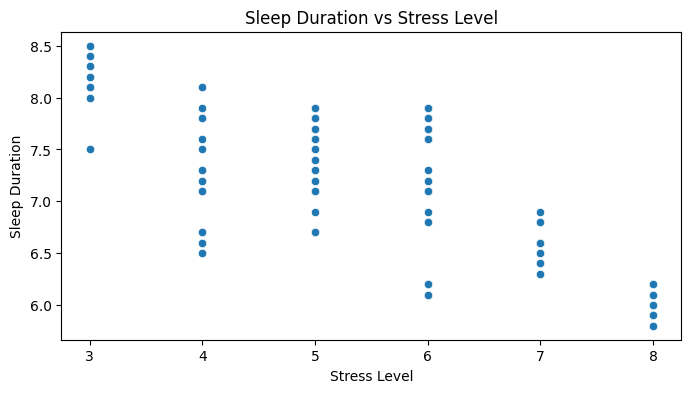

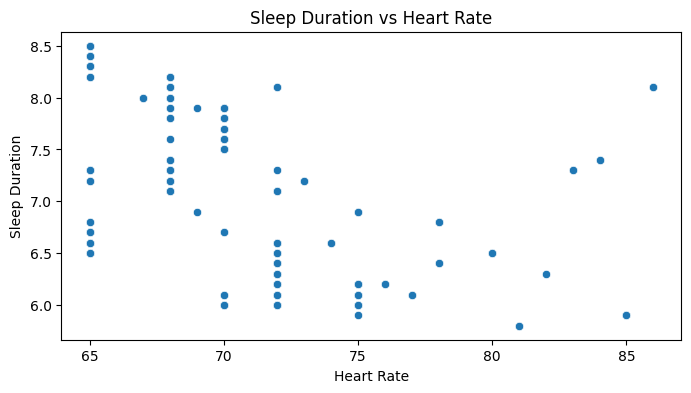

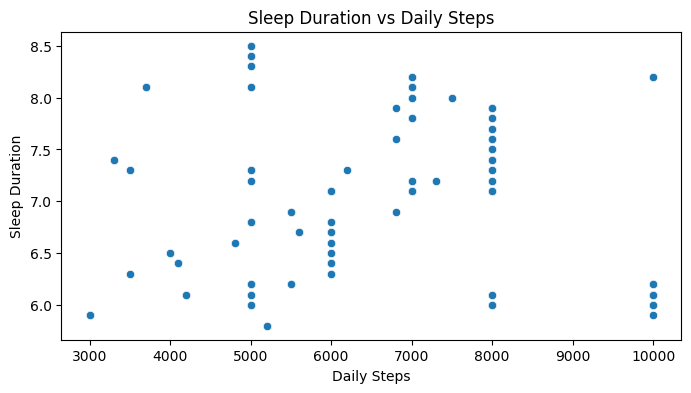

In [39]:
# Анализ распределения целевой переменной
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True)
plt.title('Распределение Sleep Duration')

plt.subplot(1, 2, 2)
sns.boxplot(y=y)
plt.title('Boxplot Sleep Duration')
plt.show()

# Анализ взаимосвязей с категориальными признаками
categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder', 'Blood Pressure']
for feature in categorical_features:
    if feature in df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=feature, y='Sleep Duration')
        plt.xticks(rotation=45)
        plt.title(f'Sleep Duration по {feature}')
        plt.show()

# Анализ взаимосвязей с числовыми признаками
numeric_features = ['Age', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=feature, y='Sleep Duration')
    plt.title(f'Sleep Duration vs {feature}')
    plt.show()

Для категориальных переменных:

- Gender у мужчин и женщин практически одинаковое распределение и значение медианы, поэтому не подходит.
- Occupation посмотрим зависимоть часов сна от профессии, разное распределение и медианы на разных профессиях, подходит, но есть выбросы.
- BMI Category подходит, чем больше вес, тем меньшше часов человек спит, медианные значения разные.
- Sleep Discoder показывает нарушения сна, и понятное дело, без расстройсв человек спит лучше, не интересно.
- Blood Pressure интересно, но очень нестабильно ведет себя график, много выбросов.

Для количесвтенных переменных:

- Age очень хаотично разбросаны точки, зависимость есть, чем старше, тем дольше спишь, но с 30 до 45 много выбросов, не подходит.
- Quality of Sleep положительная линейная корреляция, но и так понятно, что чем выше оценка сна, тем лучше спит, ну возьмем.
- Physical Activity Level положительная корреляция, чем больше занимаешься, тем лучше спишь, но многовато выбросов, не подходит.
- Stress Level отрицательня корреляция, с увеличением уровня стресса продолжительность сна уменьшается, подходит.
- heart Rate чем меньше пульс, тем дольше спит, выбросов не много, подходит.
- Daily Steps зависимость не линейная, много выбросов.



### Выбор X Y

In [11]:
# Y - переменная, которую мы хотим исследовать, предсказать, и так далее
# X - зависимые перменные, влияние которых мы изучаем на Y
y = df['Sleep Duration']
X = df.drop('Sleep Duration', axis=1) if 'Sleep Duration' in df.columns else df

X.head(n=3) # первые 3 строки перменной X, удостоверимя что Sleep Duration не существует

,Person ID,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6,42,6,Overweight,126/83,77,4200,unckown
1,2,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,unckown
2,3,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,unckown


In [12]:
y.head(n=3)

0    6.1
1    6.2
2    6.2
Name: Sleep Duration, dtype: float64

### Кодирование категориальных приизнаков

In [13]:
X['BMI Category']

0      Overweight
1          Normal
2          Normal
3           Obese
4           Obese
          ...    
369    Overweight
370    Overweight
371    Overweight
372    Overweight
373    Overweight
Name: BMI Category, Length: 374, dtype: category
Categories (4, object): ['Normal', 'Normal Weight', 'Obese', 'Overweight']

In [14]:
from sklearn.preprocessing import OneHotEncoder
# sparse_output=False → выдаёт DataFrame, а не numpy матрицу
# .fit_transfom(X) - обучить и трансформировать, т.е. вернуть результат

X[['Systolic_BP', 'Diastolic_BP']] = X['Blood Pressure'].str.split('/', expand=True).astype(int)
X = X.drop('Blood Pressure', axis=1)

gender_encoder = OneHotEncoder(sparse_output=False)
occupation_encoder = OneHotEncoder(sparse_output=False)
bmi_encoder = OneHotEncoder(sparse_output=False)
sleep_disorder_encoder = OneHotEncoder(sparse_output=False)
# blood_pressure_encoder = OneHotEncoder(sparse_output=False)

gender_encoded = gender_encoder.fit_transform(X[["Gender"]])
occupation_encoded = occupation_encoder.fit_transform(X[["Occupation"]])
bmi_encoded = bmi_encoder.fit_transform(X[["BMI Category"]])
sleep_disorder_encoded = sleep_disorder_encoder.fit_transform(X[["Sleep Disorder"]])
# blood_pressure_encoded = blood_pressure_encoder.fit_transform(X[["Blood Pressure"]])

gender_encoder.categories_
occupation_encoder.categories_
bmi_encoder.categories_
sleep_disorder_encoder.categories_
# blood_pressure_encoder.categories_

[array(['Insomnia', 'Sleep Apnea', 'unckown'], dtype=object)]

In [15]:
gender_encoder.get_feature_names_out()

array(['Gender_Female', 'Gender_Male'], dtype=object)

In [16]:
occupation_encoder.get_feature_names_out()

array(['Occupation_Accountant', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Nurse', 'Occupation_Sales Representative',
       'Occupation_Salesperson', 'Occupation_Scientist',
       'Occupation_Software Engineer', 'Occupation_Teacher'], dtype=object)

In [17]:
bmi_encoder.get_feature_names_out()

array(['BMI Category_Normal', 'BMI Category_Normal Weight',
       'BMI Category_Obese', 'BMI Category_Overweight'], dtype=object)

In [18]:
sleep_disorder_encoder.get_feature_names_out()

array(['Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea',
       'Sleep Disorder_unckown'], dtype=object)

### Предсказываем результат

In [19]:
# DataFrame для каждого закодированного признака
gender_df = pd.DataFrame(gender_encoded, columns=gender_encoder.get_feature_names_out(["Gender"]))
occupation_df = pd.DataFrame(occupation_encoded, columns=occupation_encoder.get_feature_names_out(["Occupation"]))
bmi_df = pd.DataFrame(bmi_encoded, columns=bmi_encoder.get_feature_names_out(["BMI Category"]))
sleep_disorder_df = pd.DataFrame(sleep_disorder_encoded, columns=sleep_disorder_encoder.get_feature_names_out(["Sleep Disorder"]))

# Удаляем исходные категориальные столбцы из X
# X = X.drop(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], axis=1)

# Соединяем
# X = pd.concat([X, gender_df, occupation_df, bmi_df, sleep_disorder_df], axis=1)

# Удаляем исходные категориальные столбцы из X и сохраняем в X_without_categorical
X_without_categorical = X.drop(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder'], axis=1)

# Определяем числовые признаки для масштабирования
numeric_features = ['Person ID', 'Age', 'Quality of Sleep', 'Physical Activity Level', 
                   'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP']

from sklearn.preprocessing import StandardScaler
# Масштабируем только числовые признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_without_categorical[numeric_features])
X_numeric_df = pd.DataFrame(X_scaled, columns=[f"{col}_scaled" for col in numeric_features])

# Соединяем масштабированные числовые признаки с закодированными категориальными
X = pd.concat([X_numeric_df, gender_df, occupation_df, bmi_df, sleep_disorder_df], axis=1)

X.head()

,Person ID_scaled,Age_scaled,Quality of Sleep_scaled,Physical Activity Level_scaled,Stress Level_scaled,Heart Rate_scaled,Daily Steps_scaled,Systolic_BP_scaled,Diastolic_BP_scaled,Gender_Female,...,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_unckown
0,-1.727426,-1.753096,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.718163,-1.637643,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.708901,-1.637643,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.699639,-1.637643,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.690376,-1.637643,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
'Sleep Duration' in df.columns

True

In [20]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(
    fit_intercept=True, # считать свобоный коэфициент B
    copy_X=True, # Глубокое коирование матрицы X, чтробы не модифицировать
    n_jobs=None, # None - 1 ядро используем
    positive=False, # все weight могут быть как положительными, так и отрицательными
)
model1.fit(X, y)

LinearRegression()

In [21]:
y_pred = model1.predict(X) # предсказываем результат
y_pred

array([6.52214119, 5.9650027 , 5.95913822, 5.90293224, 5.89706776,
       5.24926064, 5.64829344, 7.43997485, 7.43411037, 7.42824588,
       6.4128299 , 7.41651691, 6.40110093, 6.39523644, 6.38937196,
       6.38350748, 6.13911648, 6.3981935 , 6.16511502, 7.47009294,
       7.46422846, 7.45836397, 7.45249949, 7.44663501, 7.44077052,
       7.43490604, 7.42904155, 7.42317707, 7.41731258, 7.4114481 ,
       6.12715062, 6.15901365, 7.27371481, 6.32997614, 7.48261758,
       6.31824717, 6.31238268, 7.46502413, 7.45915964, 7.45329516,
       7.44743067, 7.44156619, 7.4357017 , 7.42983722, 7.42397274,
       7.41810825, 7.41224377, 7.40637928, 7.4005148 , 7.42106531,
       7.91908198, 7.91321749, 6.31904284, 7.47168428, 6.30731387,
       6.30144938, 7.45409083, 6.28972041, 6.28385593, 7.43649737,
       6.27212696, 6.26626247, 6.26039799, 6.25453351, 6.24866902,
       6.24280454, 6.32460433, 6.39570998, 6.47744953, 6.47158505,
       6.31397402, 6.30810954, 6.30224505, 6.29638057, 6.29051

### Анализ результатов

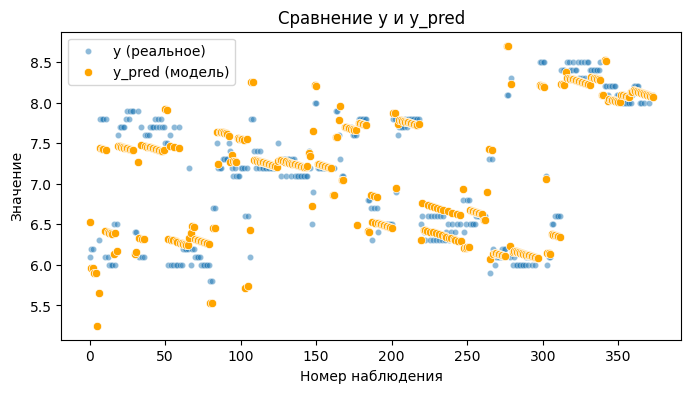

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# реальные значения точками
sns.scatterplot(x=range(len(y)), y=y, label="y (реальное)", alpha=0.5, s=20)

# предсказания линией
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="y_pred (модель)", color="orange")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title("Сравнение y и y_pred")
plt.legend()
plt.show()

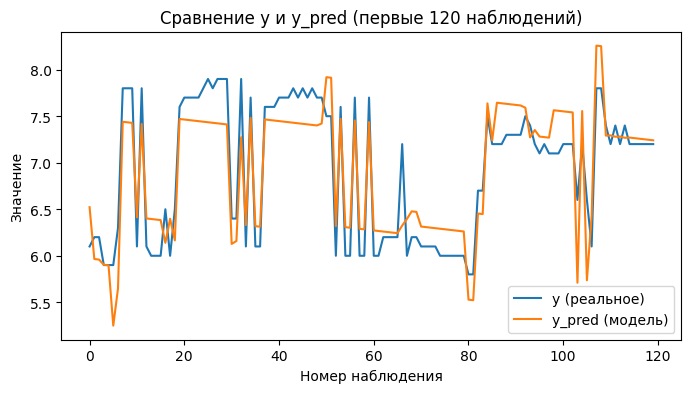

In [23]:
# ограничим диапазон
n = 120
y_small = y[:n]
y_pred_small = y_pred[:n]

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_small)), y=y_small, label="y (реальное)")
sns.lineplot(x=range(len(y_pred_small)), y=y_pred_small, label="y_pred (модель)")

plt.xlabel("Номер наблюдения")
plt.ylabel("Значение")
plt.title(f"Сравнение y и y_pred (первые {n} наблюдений)")
plt.legend()
plt.show()

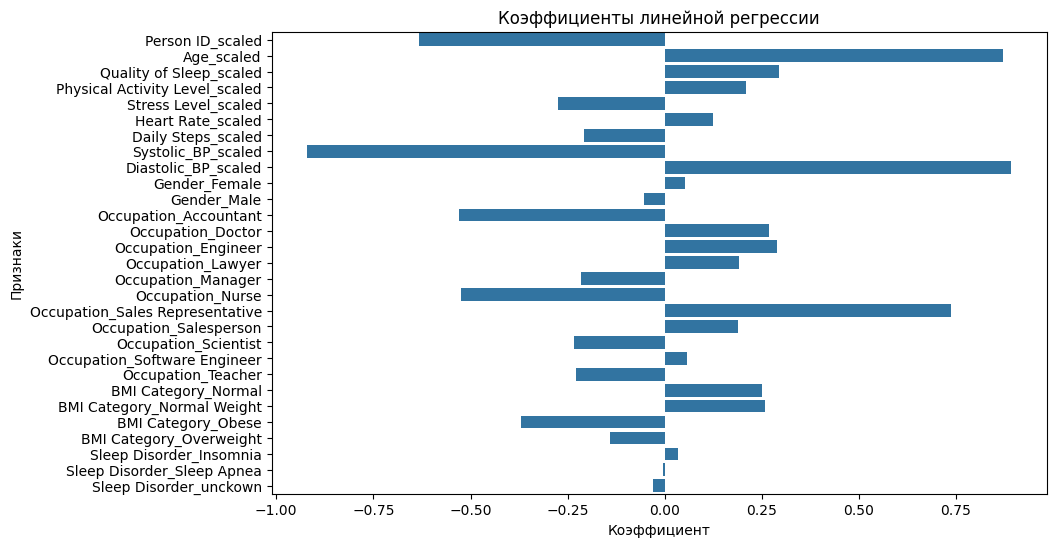

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x=model1.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

По графикам сравнения видно, что точки предсказания следуют за реальными точками, близкок идеальной линии, с небольшими отклоненииями.

По графику коэффицентов можно сказать, что большое влияние есть у професии. Напрмер работа продавца увеличивает количество сна, а бухгалтера или медсестры наоборот уменьшает.

Ожирение способствует уменьшению часов сна, а нормальный вес положительно влияет.  

С возрастом продолжительность сна увеличивается.

Также можно заметить сильную отрицательную зависимоть от систолического давления, и положительную от дистолического. Они оказывают самое большое влияние.



### Метрики качества

In [25]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error, root_mean_squared_error

y_pred = model1.predict(X)

MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)

MAE 0.170
MAPE=0.024, MAPE_as_percent=2.411%
R2=0.917
MSE=0.053
RMSE=0.229


**MAE (Mean Absolute Error)**

В среднем ошибаемся в 0.17 единиц. Значение близко к нулю, так что нормально.

**MAPE (Mean Absolute Percentage Error)**

Средняя ошибка: 2.411% все у нас отлично (<10%).

**MSE (Mean Squared Error)**

Средний квадрат ошибки 0.053, очень даже хорошо, близко к нулю.

**RMSE (Root Mean Squared Error)**

У нас 0.229, близко к нулю - хорошо.

Показывает «среднюю ошибку», но учитывает, что большие промахи сильнее влияют.

**R² (Коэффициент детерминации)**

Значение 0.917 близко к 1, так что модель предсказывает почти идеально.

### Модель 2

In [26]:
from sklearn.model_selection import train_test_split

# Используем уже обработанные данные из Модели 1
X_2 = X
y_2 = y
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)
X.head()

,Person ID_scaled,Age_scaled,Quality of Sleep_scaled,Physical Activity Level_scaled,Stress Level_scaled,Heart Rate_scaled,Daily Steps_scaled,Systolic_BP_scaled,Diastolic_BP_scaled,Gender_Female,...,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_unckown
0,-1.727426,-1.753096,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-1.718163,-1.637643,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.708901,-1.637643,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.699639,-1.637643,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.690376,-1.637643,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [27]:
model2 = LinearRegression(
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
model2.fit(X_train, y_train)

LinearRegression()

In [28]:
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

def calculate_metrics(y_true, y_pred):

  MAE = mean_absolute_error(y_true, y_pred)
  print('MAE %.3f' % MAE)

  MAPE = mean_absolute_percentage_error(y_true, y_pred)
  print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

  R2 = r2_score(y_true, y_pred)
  print('R2=%.3f' % R2)

  MSE = mean_squared_error(y_true, y_pred)
  print('MSE=%.3f' % MSE)

  RMSE = root_mean_squared_error(y_true, y_pred)
  print('RMSE=%.3f' % RMSE)

print('1) метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred)

1) метрики для выборки на которых обучалась модель
MAE 0.166
MAPE=0.023, MAPE_as_percent=2.346%
R2=0.916
MSE=0.052
RMSE=0.228


In [29]:
print('2) метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred)

2) метрики для выборки на которых модель никогда не обучалась
MAE 0.195
MAPE=0.028, MAPE_as_percent=2.838%
R2=0.899
MSE=0.068
RMSE=0.260


Значения метрик хорошие, разница между ними небольшая. R2 близко к 1, хорошо.

In [30]:
model2.coef_

array([-0.59077153,  0.84383848,  0.32685993,  0.19335268, -0.2845849 ,
        0.16519483, -0.19440995, -0.81053531,  0.77337354,  0.00369001,
       -0.00369001, -0.50673712,  0.25422557,  0.21306717,  0.1016369 ,
       -0.23862161, -0.47190501,  1.01989753,  0.10606095, -0.17875788,
       -0.12998533, -0.16888118,  0.34517837,  0.37221509, -0.66572551,
       -0.05166796,  0.04517003, -0.02190416, -0.02326588])

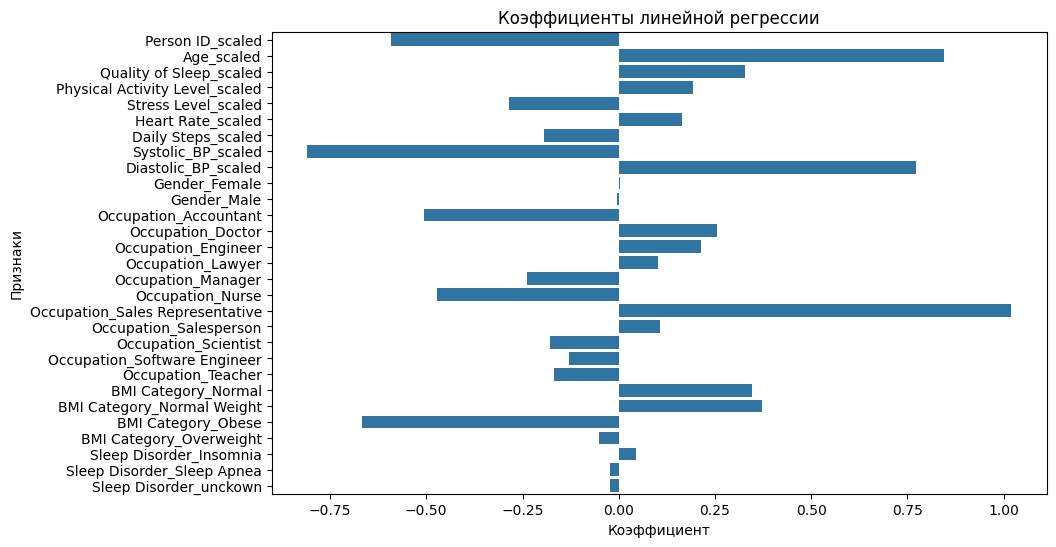

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x=model2.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

С возрастом продолжительность сна увеличивается.

Чем меньше стресса, тем больше времени человек спит.

По профессиям можно сказать, что очень плохо спят бухгалтеры, разрабы ПО и учителя. А вот продавцы, инженеры и доктора хорошо спят.

Индекс массы тела сильно отрицательно влияет на сон при ожирении, в остальном нормально.

Артериальное давление также провоцирует уменьшение количества сна (систолическое и дистолическое).

Учащенное серцебиение также пагубно влияет на сон.

### Модель 4

In [32]:
categorical_features = ['Sleep Disorder', 'Occupation', 'BMI Category', 'Blood Pressure']
numeric_features = ['Quality of Sleep','Stress Level']
best_features = categorical_features + numeric_features

X = df[best_features]
y = df['Sleep Duration']

X[['Systolic_BP', 'Diastolic_BP']] = X['Blood Pressure'].str.split('/', expand=True).astype(int)
X = X.drop('Blood Pressure', axis=1)

# Теперь только 3 числовых признака
numeric_features = ['Stress Level', 'Systolic_BP', 'Diastolic_BP', 'Quality of Sleep']

# Простое кодирование как в первой модели
sleep_disorder_encoder = OneHotEncoder(sparse_output=False)
occupation_encoder = OneHotEncoder(sparse_output=False) 
bmi_encoder = OneHotEncoder(sparse_output=False)

sleep_disorder_encoded = sleep_disorder_encoder.fit_transform(X[["Sleep Disorder"]])
occupation_encoded = occupation_encoder.fit_transform(X[["Occupation"]])
bmi_encoded = bmi_encoder.fit_transform(X[["BMI Category"]])

# Создаем DataFrame
sleep_disorder_df = pd.DataFrame(sleep_disorder_encoded, columns=sleep_disorder_encoder.get_feature_names_out(["Sleep Disorder"]))
occupation_df = pd.DataFrame(occupation_encoded, columns=occupation_encoder.get_feature_names_out(["Occupation"]))
bmi_df = pd.DataFrame(bmi_encoded, columns=bmi_encoder.get_feature_names_out(["BMI Category"]))

# Удаляем категориальные столбцы
X_without_categorical = X.drop(['Sleep Disorder', 'Occupation', 'BMI Category'], axis=1)

# Стандартизация числовых признаков
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_without_categorical)
X_numeric_df = pd.DataFrame(X_numeric_scaled, columns=numeric_features)

# Соединяем всё
X = pd.concat([X_numeric_df, sleep_disorder_df, occupation_df, bmi_df], axis=1)

X.head()

<ipython-input-32-16863685e967>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Systolic_BP', 'Diastolic_BP']] = X['Blood Pressure'].str.split('/', expand=True).astype(int)
<ipython-input-32-16863685e967>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Systolic_BP', 'Diastolic_BP']] = X['Blood Pressure'].str.split('/', expand=True).astype(int)


,Stress Level,Systolic_BP,Diastolic_BP,Quality of Sleep,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,Sleep Disorder_unckown,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,-1.098280,0.347021,-0.330002,-0.268102,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.098280,1.475592,-0.459239,-0.755640,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.098280,1.475592,-0.459239,-0.755640,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-2.771424,1.475592,1.479309,0.869486,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-2.771424,1.475592,1.479309,0.869486,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Рездляем данные как 80% - обучение, 20% на тест
len(X_train), len(X_test), len(y_train), len(y_test)

(299, 75, 299, 75)

In [34]:
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression()

In [35]:
y_train_pred = model4.predict(X_train)
y_test_pred = model4.predict(X_test)

print('1) метрики для выборки на которых обучалась модель')
calculate_metrics(y_train, y_train_pred)

1) метрики для выборки на которых обучалась модель
MAE 0.210
MAPE=0.030, MAPE_as_percent=2.987%
R2=0.880
MSE=0.074
RMSE=0.273


In [36]:
print('2) метрики для выборки на которых модель никогда не обучалась')
calculate_metrics(y_test, y_test_pred)

2) метрики для выборки на которых модель никогда не обучалась
MAE 0.210
MAPE=0.031, MAPE_as_percent=3.053%
R2=0.894
MSE=0.070
RMSE=0.265


Значения метрик хорошие, разница между ними небольшая. R2 близко к 1, хорошо.

In [37]:
model4.coef_

array([ 0.5062911 , -0.22390528, -0.51352159,  0.45453941,  0.02021555,
        0.05663059, -0.07684614, -0.48346778,  0.2744384 ,  0.31395259,
        0.12017382, -0.12228636, -0.14791369,  0.61354979,  0.07152922,
        0.05087245, -0.28783998, -0.40300847, -0.09018999,  0.07370121,
        0.10070045, -0.08421167])

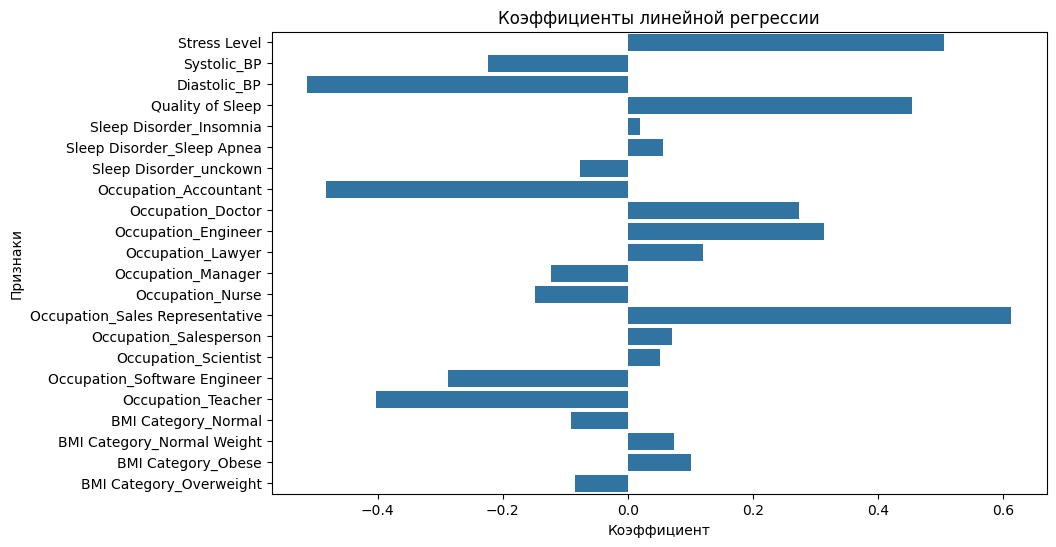

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=model4.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

Чем меньше стресса, тем больше времени человек спит. (после StandardScaler стресс отображается как отрицательные значения. Меньший стресс = более отрицательные значения)

По профессиям можно сказать, что очень плохо спят бухгалтеры, разрабы ПО и учителя. А вот продавцы, инженеры и доктора хорошо спят.

Индекс массы тела сильно отрицательно влияет на сон при ожирении, в остальном нормально.

Артериальное давление также провоцирует уменьшение количества сна (систолическое и дистолическое).

In [43]:
model3 = LinearRegression(
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
model3.fit(X, y)

LinearRegression()

In [45]:
y_best_pred = model3.predict(X)
MAE = mean_absolute_error(y, y_pred)
print('MAE %.3f' % MAE)

MAPE = mean_absolute_percentage_error(y, y_pred)
print('MAPE=%.3f, MAPE_as_percent=%.3f%s' % (MAPE, MAPE * 100, '%'))

R2 = r2_score(y, y_pred)
print('R2=%.3f' % R2)

MSE = mean_squared_error(y, y_pred)
print('MSE=%.3f' % MSE)

RMSE = root_mean_squared_error(y, y_pred)
print('RMSE=%.3f' % RMSE)

MAE 0.170
MAPE=0.024, MAPE_as_percent=2.411%
R2=0.917
MSE=0.053
RMSE=0.229


MAE, MSE, RMSE близко к нулю, хорошо.

R2 возле 1, значит модель хорошо обучена.

In [47]:
model3.coef_

array([ 0.48041245, -0.25136297, -0.60386026,  0.53831785,  0.03142239,
        0.05370562, -0.08512801, -0.49508602,  0.26350109,  0.33557907,
        0.12128765, -0.12609224, -0.13779349,  0.47065515,  0.08040451,
        0.03696244, -0.11050366, -0.4389145 , -0.1191029 ,  0.00314007,
        0.24117303, -0.12521021])

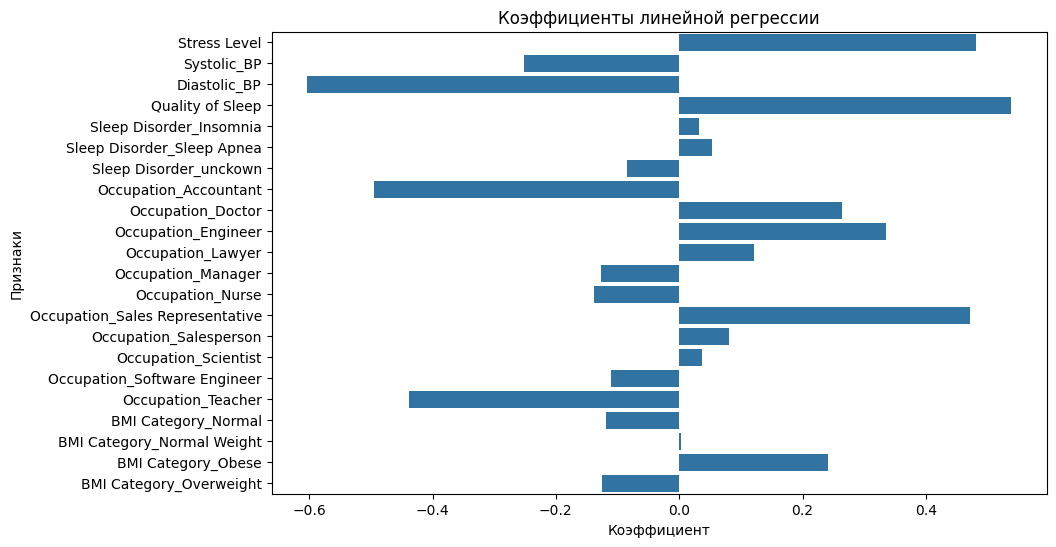

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x=model3.coef_, y=X.columns, orient="h")
plt.xlabel("Коэффициент")
plt.ylabel("Признаки")
plt.title("Коэффициенты линейной регрессии")
plt.show()

Итак, по всем моделям вывод:

- R2 0.917-0.894
- MAPE 3.053-2.411, то есть примерно 3%
- Разница R2 между train и test < 0.02

Значит модель стабильна и не переобучена

- Давление, професия, стресс, оценка сна и ИМТ - эти коэффиценты стабильно важны во всех моделях
- В 4 модели после скелера стресс поменял величину, корреляция не изменилась, изменился просто знак (с + на -)

Отобранные признаки не ухудшают качество модели